In [1]:
!pip install minisom >log
!pip install xlrd >log

In [21]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from minisom import MiniSom

In [14]:
df = pd.read_excel("paises.xlsx")
paises = df['Paises']
df.drop('Paises', axis=1 , inplace = True)

In [17]:
df.values
df.to_csv('paises.csv')
data = pd.read_csv('paises.csv')
data.drop('Unnamed: 0',axis=1, inplace=True)

In [18]:
data.head()
data['Educacao'] = data['Educacao'].astype(float)
data['Expectativa de Vida'] = data['Expectativa de Vida'].astype(float)
data['PIB'] = data['PIB'].astype(float)
data['Estabilidade Politica'] = data['Estabilidade Politica'].astype(float)

In [19]:
som = MiniSom(25, 25, 4, sigma=1.0, learning_rate=0.5, topology='hexagonal', neighborhood_function='gaussian', random_seed=33)
som.train(df.values, 5000)


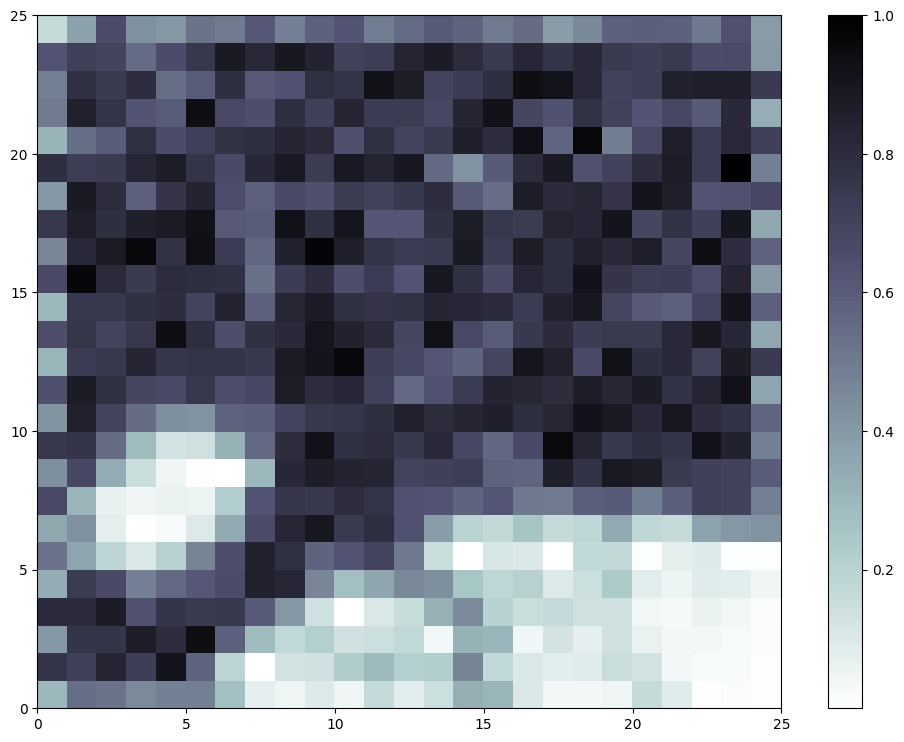

In [22]:
plt.figure(figsize=(12, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()
plt.show()

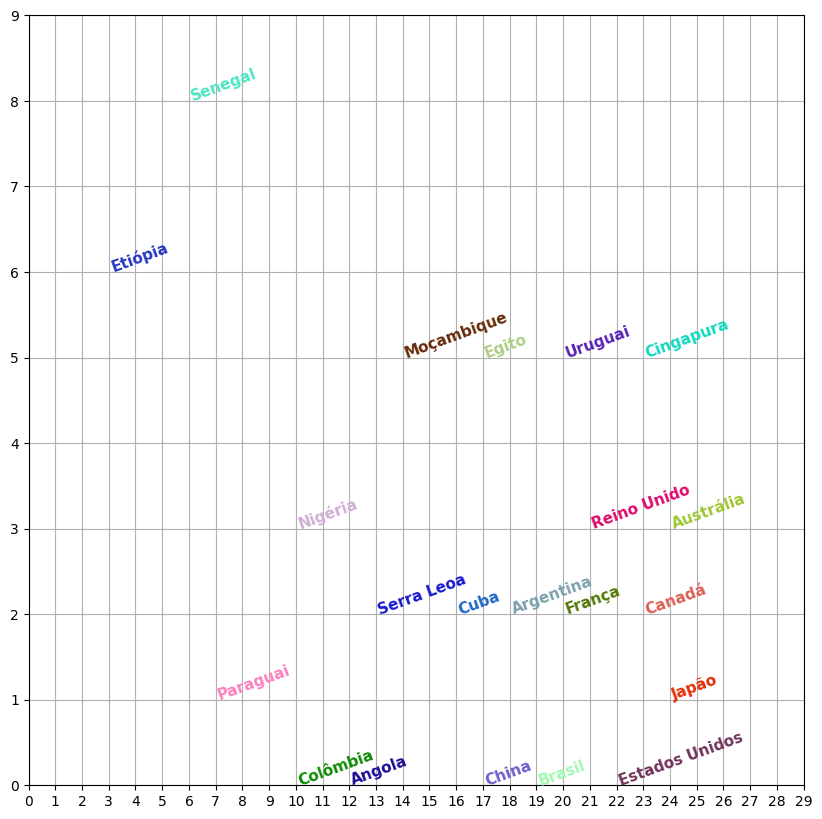

In [23]:
plt.figure(figsize=(10,10))
wmap = {}
im = 0

for x, t in zip(data.values, paises):
  w = som.winner(x)
  wmap[w] = im
  plt.text(
      w[0], w[1], str(t),
      rotation=20,
      c=np.random.rand(3,),
      fontdict={'weight': 'bold', 'size': 11}
  )
  im = im+1
plt.xticks(range(30))
plt.yticks(range(10))
plt.grid()

plt.show()